In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

from matplotlib import font_manager as fm





'''
#파일 불러오기
url_unique = 'C:\\Users\\bbok\\Desktop\\DSL\\EDA\\youtube_unique_0717.csv'
df_unique = pd.read_csv(url_unique,lineterminator='\n') 


url_youtube = 'C:\\Users\\bbok\\Desktop\\DSL\\EDA\\channel_total.csv'
df_new = pd.read_csv(url_youtube,lineterminator='\n')



#1. 기존 데이터; 동영상 시간 분석(카테고리별, 조회수 구간 별)
sns.histplot(data = df_new['video_time'], color = 'red', bins = 20)
plt.ylim([0,1000])
plt.show()

'''
#2. 동영상 올리는 주기

#일 단위, 주 단위, 달단위 년 단위, 5년 이상으로 구분



'''
IDs=list(df_new['channelId'].unique())
period=pd.DataFrame({
    "IDs":IDs,
})
period = period.set_index('IDs')

period['day']=0
period['week']=0
period['month']=0
period['year']=0
period['years']=0
period['long']=0

for i in range(df_new.shape[0]):
    haeng=df_new.iloc[i]
    when=haeng['when']
    perhang=period.loc[haeng['channelId']]
    
    
    if '시간' in when or '분' in when or '초' in when:
        perhang['day']+=1
        
    elif '일' in when:
        perhang['week']+=1

    elif '주' in when:
        perhang['month']+=1
        
    elif '개월' in when:
        perhang['year']+=1
        
    elif '년' in when and [1,2,3,4,5] in re.findall(r'\d', when):
        perhang['years']+=1
    
    elif '년' in when:
        perhang['long']+=1


        
        
print(period)



        
        
        
        
        
        
        
'''


ModuleNotFoundError: No module named 'wordcloud'

In [7]:
#3. 키워드 파악
import numpy as np
import pandas as pd
import konlpy
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator

#파일 불러오기

df = pd.read_csv("C:\\Users\\bbok\\Desktop\\DSL\\EDA\\youtube_2017unique.csv",lineterminator='\n')
print(df)
categories=list(df['category_name'].unique())
print(categories)

titles=[]
for i in range(df.shape[0]):
    haeng=df.iloc[i]
    titles.append(haeng['title'])
    
print(title)

'''
words=pd.DataFrame({
    "IDs":IDs,
})
period = period.set_index(IDs)

for ids in df:
    komoran = konlpy.tag.Komoran()
'''


          video_id        trending_date  \
0      RxGQe4EeEpA  2017-11-16 00:00:00   
1      hH7wVE8OlQ0  2017-11-14 00:00:00   
2      9V8bnWUmE9U  2017-11-15 00:00:00   
3      0_8py-t5R80  2017-11-17 00:00:00   
4      bk55RbxiQdI  2017-11-18 00:00:00   
...            ...                  ...   
15870  D5slHtZSvjY  2018-06-14 00:00:00   
15871  C2Aw5HoDJX0  2018-06-14 00:00:00   
15872  ckQpVlwY0Yk  2018-06-14 00:00:00   
15873  B1Jm5lBHLLc  2018-06-14 00:00:00   
15874  7niLVY31miI  2018-06-14 00:00:00   

                                                   title channel_title  \
0                                     좋아 by 민서_윤종신_좋니 답가        라푸마코리아   
1                                       JSA 귀순 북한군 총격 부상        Edward   
2                             나몰라패밀리 운동화 영상 2탄 (빼빼로데이버젼)     나몰라패밀리 핫쇼   
3                             이명박 출국 현장, 놓치면 안되는 장면         미디어몽구   
4                                김장겸은 물러갔다 MBC 노조 환호와 눈물        NocutV   
...                                    

TypeError: 'int' object is not subscriptable

['People & Blogs']


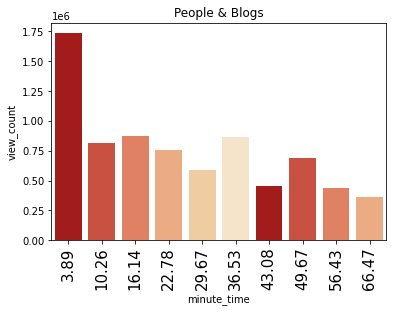

['Howto & Style']


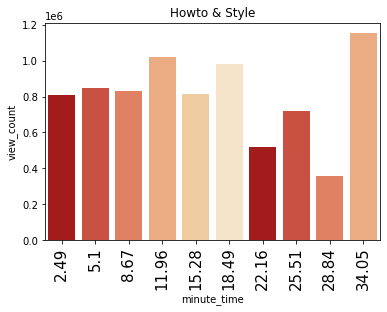

['Entertainment']


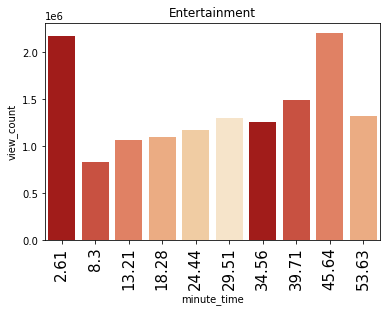

['Music']


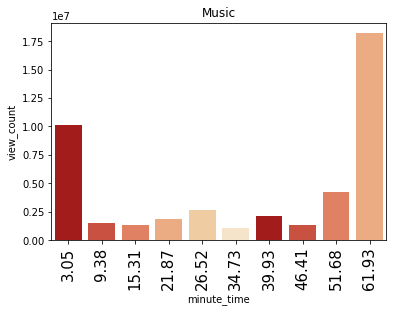

['Gaming']


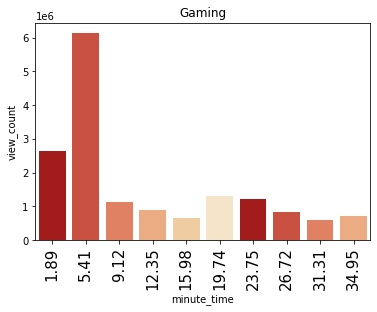

['Comedy']


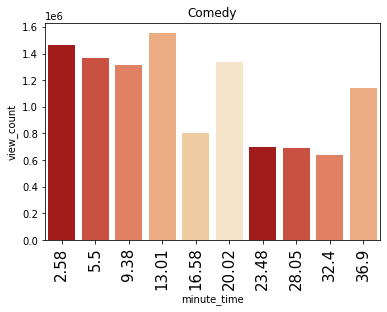

['Film & Animation']


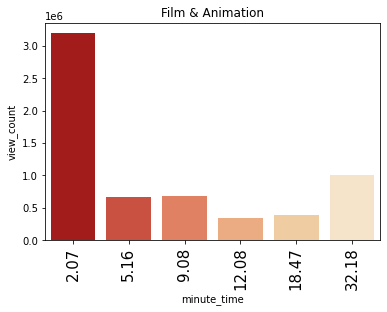

['Pets & Animals']


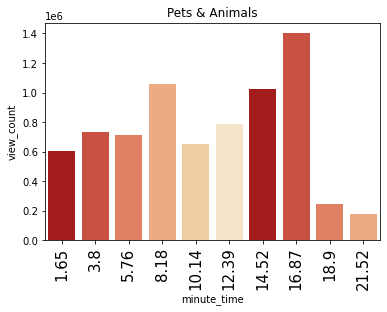

['Science & Technology']


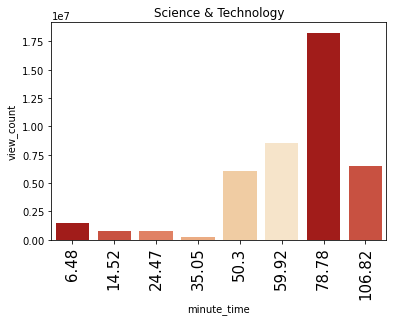

['Sports']


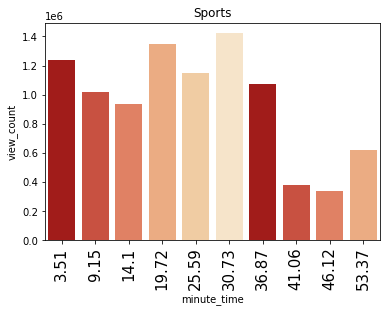

['Education']


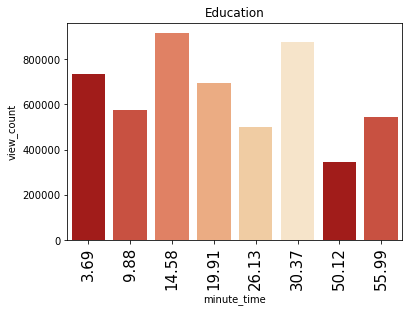

['News & Politics']


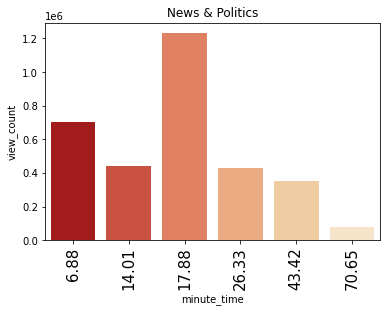

['Autos & Vehicles']


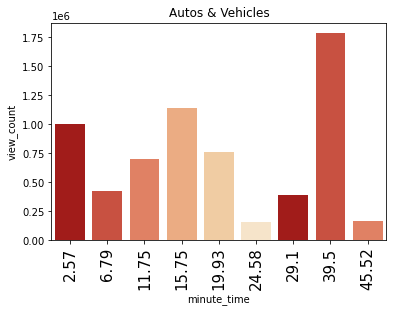

['Nonprofits & Activism']


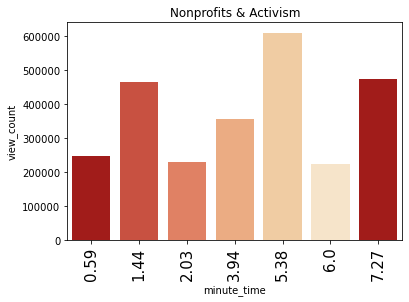

['Travel & Events']


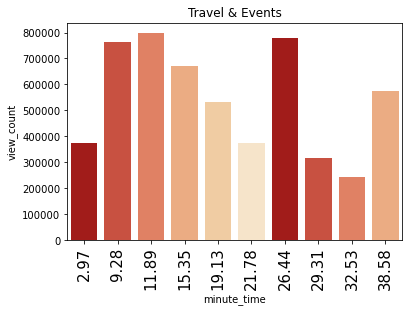

In [25]:
#4. 재생시간 시간과 조회수 간의 관계
#노더블 unique과 channel total (채널)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import re

from matplotlib import font_manager as fm

#파일 불러오기
nodouble_unique = 'C:\\Users\\bbok\\Desktop\\DSL\\EDA\\youtube_nodouble_unique.csv'
nod = pd.read_csv(nodouble_unique,lineterminator='\n') 

channel_total = 'C:\\Users\\bbok\\Desktop\\DSL\\EDA\\channel_total.csv'
tot = pd.read_csv(channel_total,lineterminator='\n') 



categories=['People & Blogs', 'Howto & Style' ,'Entertainment', 'Music', 'Gaming',
 'Comedy' ,'Film & Animation', 'Pets & Animals' ,'Science & Technology',
 'Sports' ,'Education', 'News & Politics', 'Autos & Vehicles',
 'Nonprofits & Activism' ,'Travel & Events']




 #time_range를 모든 category에 대해 10개로 분할
'''
print('minute time=  ',df['minute_time'].unique())
print(df[['time_range','minute_time']])
  '''   
'''
#이 주석 내에 있는 것으로 
df=nod.merge(tot, how='inner', on='video_id')
df['time_range']=pd.cut(df['minute_time'],bins=20)
for cat in categories:
     #채널 아이디 기준으로 merge
    
    df2=df[df['category_name']==cat] #해당하는 카테고리만 추출
    print(df2['category_name'].unique()) #확인
    
    df2=df2.sort_values(by='minute_time')
    df2=df2.groupby(['time_range']).mean()[['view_count','minute_time']] #구간 마다 veiw_count와 minute_time 의 평균 추출
    df2['minute_time']=round(df2['minute_time'],2)
    df2.sort_values(by='minute_time') #minute_time sort


    #범위 나누기
    plt.xticks( fontsize=15,rotation=90)
    plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f s')) #소수점 자릿수
    sns.barplot(data = df2, x = 'minute_time', y = 'view_count')
    plt.savefig('test',dpi=300)
    plt.show()
    #['People & Blogs' 'Howto & Style' 'Entertainment' 'Music' 'Gaming'
    # 'Comedy' 'Film & Animation' 'Pets & Animals' 'Science & Technology'
    # 'Sports' 'Education' 'News & Politics' 'Autos & Vehicles'
    # 'Nonprofits & Activism' 'Travel & Events']
    '''


for cat in categories:
     #채널 아이디 기준으로 merge
    df=nod.merge(tot, how='inner', on='video_id')
    df=df[df['category_name']==cat] #해당하는 카테고리만 추출
    print(df['category_name'].unique()) #확인
    df['time_range']=pd.cut(df['minute_time'],bins=10)
    df=df.sort_values(by='minute_time')
    df2=df.groupby(['time_range']).mean()[['view_count','minute_time']] #구간 마다 veiw_count와 minute_time 의 평균 추출
    df2['minute_time']=round(df2['minute_time'],2)
    df2.sort_values(by='minute_time') #minute_time sort
    
    custom_palette = sns.color_palette('OrRd_r')
    plt.xticks( fontsize=15,rotation=90)
    plt.title(cat)
    plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f s')) #소수점 자릿수
    sns.barplot(data = df2, x = 'minute_time', y = 'view_count',palette=custom_palette)

    plt.show()
    
    
    #people& blogs: 5분 내외가 가장 높고 다음이 2분. 그 이상은 비슷하게 적음
    #['Film & Animation'] 1분 10초 정도가가 압도적으로 높음. 갈수록 적어지다가 34분 가량에 조금 높지만, 1분보다는 한참 모자람
    #['News & Politics'] 17분 정도가 가장 높음. 중간은 그저 그렇고 5분대가 또 되게 높음. 그 이하는 별 차이 없음
    #['Travel & Events'] 25분이 압도적으로 높고 다른 건 비슷.
    #people& blogs // people& blogs // 

['People & Blogs' 'Howto & Style' 'Entertainment' 'Music' 'Gaming'
 'Comedy' 'Film & Animation' 'Pets & Animals' 'Science & Technology'
 'Sports' 'Education' 'News & Politics' 'Autos & Vehicles'
 'Nonprofits & Activism' 'Travel & Events']


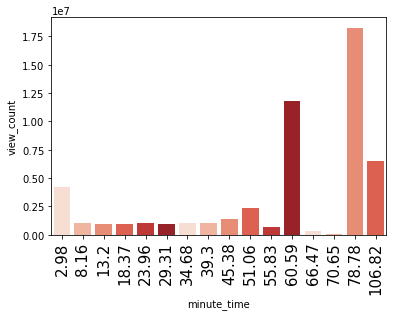

In [8]:
#4. 재생시간 시간과 조회수 간의 관계
#노더블 unique과 channel total (채널)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import re

from matplotlib import font_manager as fm

#파일 불러오기
nodouble_unique = 'C:\\Users\\bbok\\Desktop\\DSL\\EDA\\youtube_nodouble_unique.csv'
nod = pd.read_csv(nodouble_unique,lineterminator='\n') 

channel_total = 'C:\\Users\\bbok\\Desktop\\DSL\\EDA\\channel_total.csv'
tot = pd.read_csv(channel_total,lineterminator='\n') 



categories=['People & Blogs', 'Howto & Style' ,'Entertainment', 'Music', 'Gaming',
 'Comedy' ,'Film & Animation', 'Pets & Animals' ,'Science & Technology',
 'Sports' ,'Education', 'News & Politics', 'Autos & Vehicles',
 'Nonprofits & Activism' ,'Travel & Events']




 #time_range를 모든 category에 대해 10개로 분할




df=nod.merge(tot, how='inner', on='video_id')

print(df['category_name'].unique()) #확인



df['time_range']=pd.cut(df['minute_time'],bins=20)
df=df.sort_values(by='minute_time')
df2=df.groupby(['time_range']).mean()[['view_count','minute_time']] #구간 마다 veiw_count와 minute_time 의 평균 추출
df2['minute_time']=round(df2['minute_time'],2)
df2.sort_values(by='minute_time') #minute_time sort

custom_palette = sns.color_palette("Reds")

sns.barplot(data = df2, x = 'minute_time', y = 'view_count',palette=custom_palette)


plt.xticks( fontsize=15,rotation=90)

plt.show()
 
    


['People & Blogs' 'Howto & Style' 'Entertainment' 'Music' 'Gaming'
 'Comedy' 'Film & Animation' 'Pets & Animals' 'Science & Technology'
 'Sports' 'Education' 'News & Politics' 'Autos & Vehicles'
 'Nonprofits & Activism' 'Travel & Events']
         video_id                                            title_x  \
173   PxII0eQUZiE                    외계인의 지구침략 가능성 7가지 분석! [북툰 과학다큐]   
565   PNo4ZilrVS0  Snow Flower Happy Birthday V (BTS) Sumi Jo [Su...   
55    U8qm4M-qYcE  (ENG) 자고 있는 남자친구 구경하면 생기는 일 *Cute Reaction* [쏘...   
2459  yiydjb8Phwc                D-DAY : EP.02 [동원이가 그리는 아낌없이 주는 나무]   
1550  rqAMg1jp6KY                 장민호, 전지적 민호 시점으로 담아낸 미스터트롯 콘서트 현장!   
...           ...                                                ...   
3429  DJYYqCl7emc                         [NMIXX] O.O Dance Practice   
2992  -uU6-EsF9EM                        1%만 볼 수 있는 신기한 착시현상 #Shorts   
2989  wNxgphor8HE                                       MZ세대를 만난 X세대   
3316  OZdK1czhuv8        BLACKPINK 2022 W

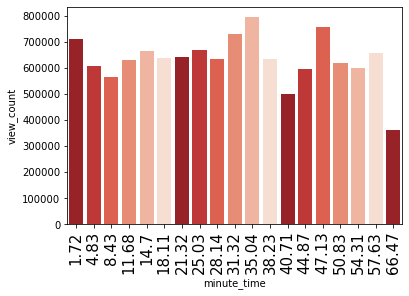

In [22]:
#4. 재생시간 시간과 조회수 간의 관계
#노더블 unique과 channel total (채널)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import seaborn as sns
import re

from matplotlib import font_manager as fm

#파일 불러오기
nodouble_unique = 'C:\\Users\\bbok\\Desktop\\DSL\\EDA\\youtube_nodouble_unique.csv'
nod = pd.read_csv(nodouble_unique,lineterminator='\n') 

channel_total = 'C:\\Users\\bbok\\Desktop\\DSL\\EDA\\channel_total.csv'
tot = pd.read_csv(channel_total,lineterminator='\n') 



categories=['People & Blogs', 'Howto & Style' ,'Entertainment', 'Music', 'Gaming',
 'Comedy' ,'Film & Animation', 'Pets & Animals' ,'Science & Technology',
 'Sports' ,'Education', 'News & Politics', 'Autos & Vehicles',
 'Nonprofits & Activism' ,'Travel & Events']




 #time_range를 모든 category에 대해 10개로 분할




df=nod.merge(tot, how='inner', on='video_id')

print(df['category_name'].unique()) #확인

df=df.sort_values(by='view_count')
num=df.shape[0]
df=df.iloc[int(num*0.01):int(num*0.95),:]
print(df)


df['time_range']=pd.cut(df['minute_time'],bins=20)
df=df.sort_values(by='minute_time')
df2=df.groupby(['time_range']).median()[['view_count','minute_time']] #구간 마다 veiw_count와 minute_time 의 평균 추출
df2['minute_time']=round(df2['minute_time'],2)
df2.sort_values(by='minute_time') #minute_time sort

custom_palette = sns.color_palette('Reds_r')
sns.set_palette(custom_palette)
plt.xticks( fontsize=15,rotation=90)
plt.gca().xaxis.set_major_formatter(mticker.FormatStrFormatter('%.2f s')) #소수점 자릿수
sns.barplot(data = df2, x = 'minute_time', y = 'view_count',palette=custom_palette)
plt.savefig('test',dpi=300)
plt.show()
 
    
